# neu 350 spring 2021<br>week 5: analyzing the Drosophila courtship song

## contents

* [0. preamble](#head)
* [1. loading libraries](#lib)  
* [2. loading data](#load)
* [3. plotting fly song features](#plot)

---

Please report any bugs/problems with this notebook to [Ed Discussion](https://edstem.org/us/courses/4492/discussion/).  

<u>Version 2021-02-28.</u> Tested to be compatible with:
* python 3.8.5
* numpy 1.19.2
* matplotlib 3.3.2
* scipy 1.5.2
* jupyter notebook 6.1.4



<a id="head"></a>
## 0. Preamble

This week's experiment features recordings of fly courtship song evoked by optogenetic stimulation of neurons in the fly song production circuit.

If you have not already, you should familiarize yourself with the experiment using the materials posted to Canvas.  There is much to understand about these experiments.

This notebook is more sparse than our earlier tutorial notebooks.  The question you ask of these data and the way you go about doing so are left to you.  We will be happy to consult with you conceptually on the approach.

### Relevant techniques already in our toolbox

* <span style="color:magenta">__data wrangling__</span>, particularly dealing with separating into trials and bins & averaging summary statistics across trials


### Techniques we introduce in this notebook
* we introduce but do not ask you to perform <span style="color:magenta">__fly song segmentation__</span>, in which the features of courtship song (sine and pulse song elements, carrier frequencies thereof) are detected and labeled (by specifying indices), which we then plot.  Your job here is largely to make sense of what these annotations mean and then report a comparison based on them.

### Things you may need to look up
* how to perform a specific <span style="color:magenta">__statistical test__</span> in python


<a id="lib"></a>
## 1. Loading Libraries

In [1]:
# Import packages

import os
import numpy as np
import matplotlib.pyplot as pl
import scipy as sp
from scipy.io import loadmat

!python --version

Python 3.8.5


In [2]:
import matplotlib
%matplotlib notebook

<a id="load"></a>
## 2. Loading Data

In [3]:
# load .mat file -- this is for the segmentwrapper as patched on 2019-11-13

mat = loadmat('flysong.mat')

raw, times, sines, pulses = mat['dataout'], mat['times'], mat['sines'], mat['pulses']
times = times.squeeze()

<a id="plot"></a>
## 3. Plotting fly song features

<IPython.core.display.Javascript object>


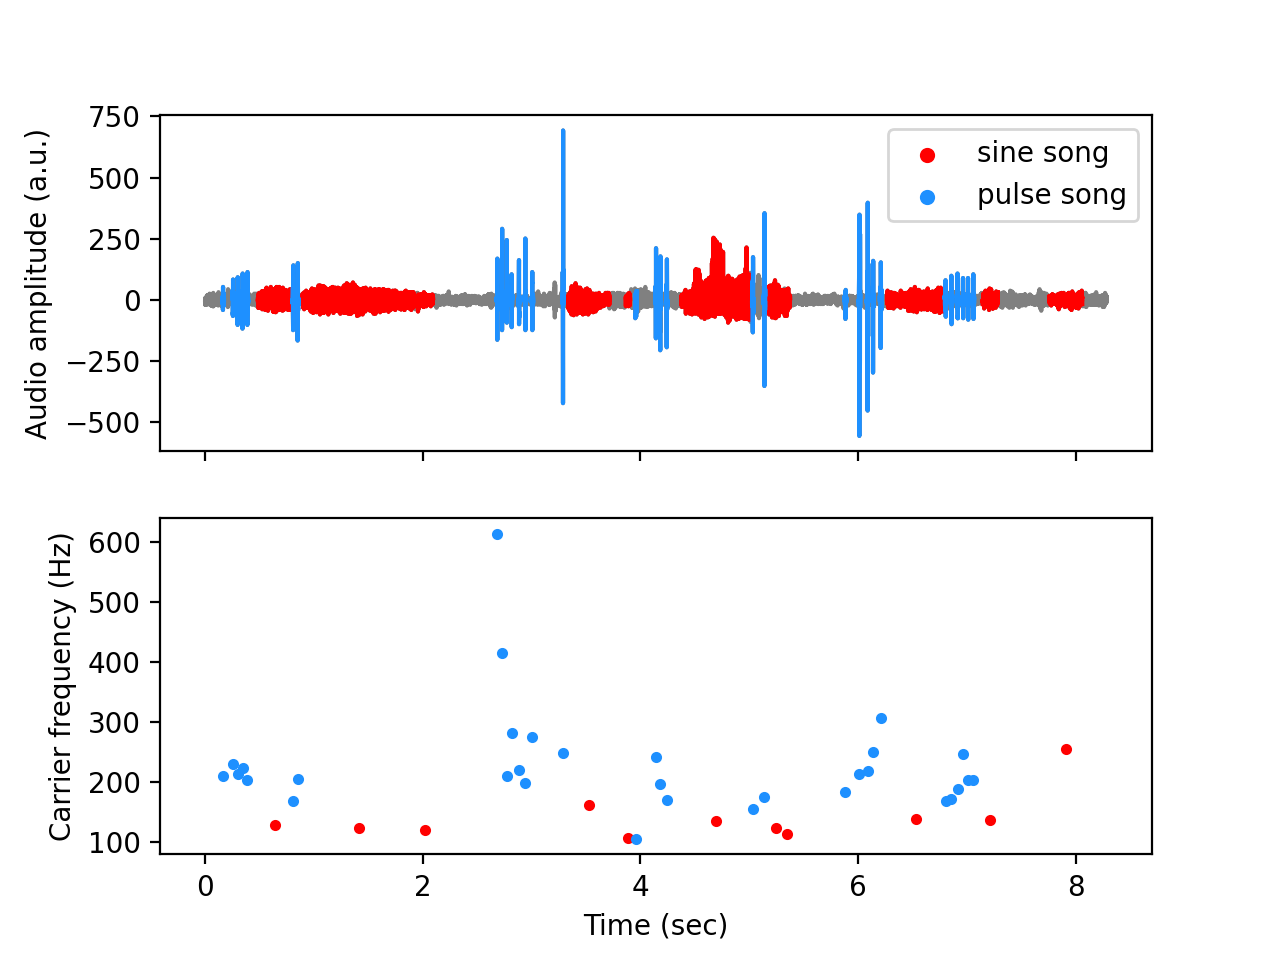

Text(0, 0.5, 'Carrier frequency (Hz)')

In [4]:
# make a plot of the fly song, with pulse and sine song annotated by color
# make a second plot of the carrier frequencies of detected sine and pulse song.

fig,axs = pl.subplots(2, 1, sharex=True)

# plot raw mic trace
axs[0].plot(times,raw[:,0], color='grey') 
axs[0].set_ylabel('Audio amplitude (a.u.)')

#unpack sine annotation
sine_starts = sines[0].astype(int)     # start coord of a sine song bout
sine_ends = sines[1].astype(int)       # end coord of a sine song bout

sine_cfs = sines[2]                    # carrier freq of that bout
sine_cft = times[((sine_starts + sine_ends)/2).astype(int)] # plot CF at the center of the detected feature

#unpack pulse annotation
pulse_starts = pulses[1].astype(int)   # start coord of an individual pulse
pulse_ends = pulses[2].astype(int)     # end coord of an individual pulse

pulse_cfs = pulses[3]                  # carrier freq of that individual pulse
pulse_cft = times[((pulse_starts + pulse_ends)/2).astype(int)] # time coord at center of that pulse


#paint sines red, pulses blue
for i in range(len(sine_starts)):
    sine_line = axs[0].plot(times[sine_starts[i]:sine_ends[i]],
                            raw[sine_starts[i]:sine_ends[i],0],
                            color='red')

for i in range(len(pulse_starts)):
    pulse_line =axs[0].plot(times[pulse_starts[i]:pulse_ends[i]],
                            raw[pulse_starts[i]:pulse_ends[i],0],
                            color='dodgerblue')

#legend
axs[0].scatter([], [], c="red", label="sine song", s=20)  # make an empty scatter plot to generate the legend from
axs[0].scatter([], [], c="dodgerblue", label="pulse song", s=20)
axs[0].legend(loc="best")

    
# second y axis (dots): carrier frequencies
axs[1].plot(sine_cft, sine_cfs, marker='.', color='red', linewidth=0)
axs[1].plot(pulse_cft, pulse_cfs, marker='.', color='dodgerblue', linewidth=0)


axs[1].set_xlabel('Time (sec)')
axs[1].set_ylabel('Carrier frequency (Hz)')




<IPython.core.display.Javascript object>


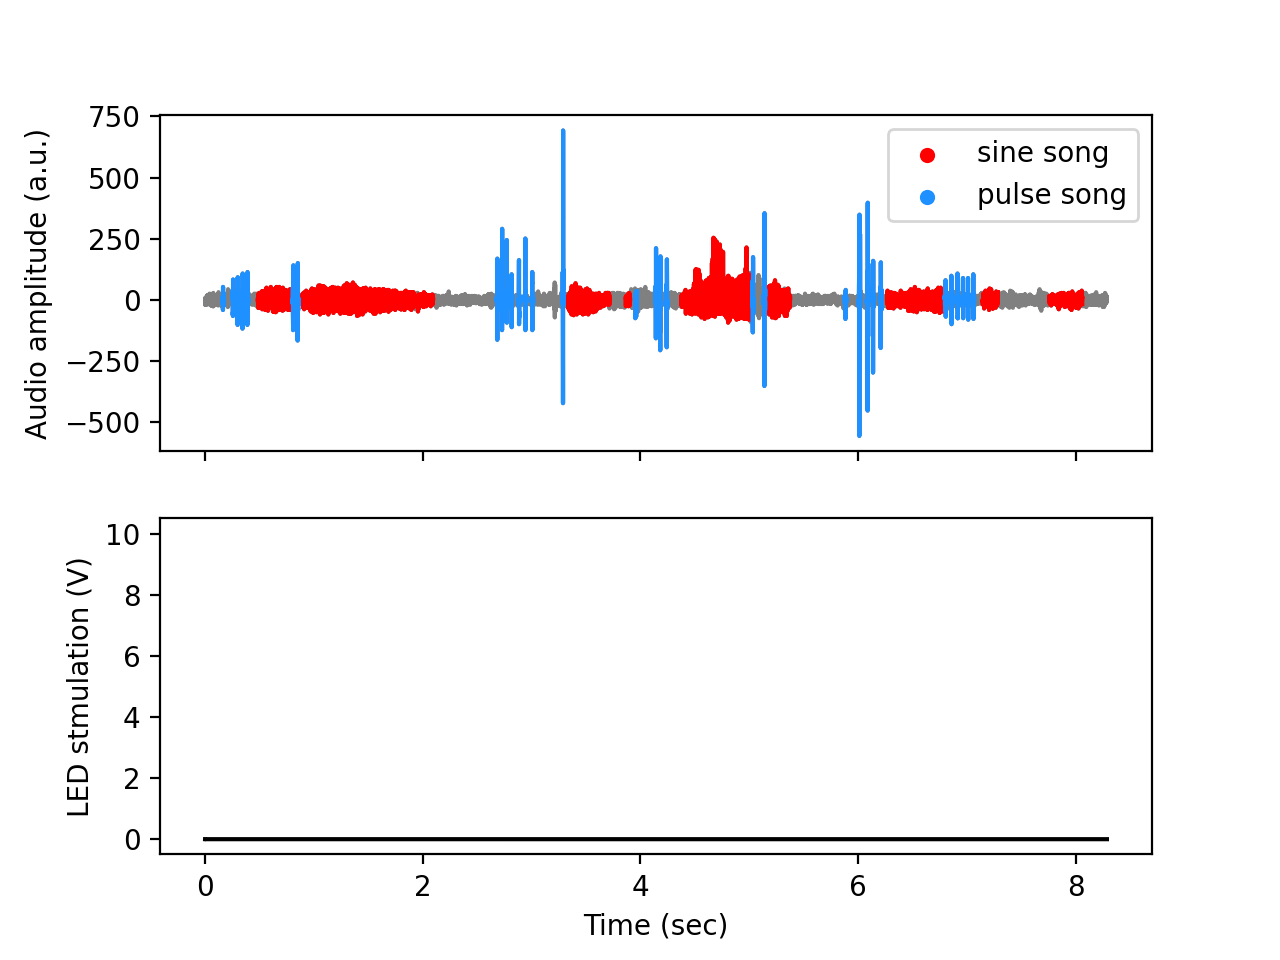

Text(0.5, 0, 'Time (sec)')

In [5]:
# Let's plot a figure with the LED stimulus trace instead of the carrier frequency
# in the second plot  (The sample file recorded the LED channel, but there was no stim!)

fig2,ax2 = pl.subplots(2, 1, sharex=True)

# plot raw mic trace
ax2[0].plot(times,raw[:,0], color='grey')
ax2[0].set_ylabel('Audio amplitude (a.u.)')


#paint sines red, pulses blue
for i in range(len(sine_starts)):
    ax2[0].plot(times[sine_starts[i]:sine_ends[i]],
                raw[sine_starts[i]:sine_ends[i],0],
                color='red')

for i in range(len(pulse_starts)):
    ax2[0].plot(times[pulse_starts[i]:pulse_ends[i]],
                raw[pulse_starts[i]:pulse_ends[i],0],
                color='dodgerblue')

#legend
ax2[0].scatter([], [], c="red", label="sine song", s=20)
ax2[0].scatter([], [], c="dodgerblue", label="pulse song", s=20)
ax2[0].legend(loc="best")
    

    
# second y axis (dots): LED stimulus
ax2[1].plot(times,raw[:,1], color='black')
ax2[1].set_ylabel('LED stmulation (V)')
ax2[1].set_ylim((-0.5,10.5))  # this trace has no stim!
ax2[1].set_xlabel('Time (sec)')
